In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json

file_path = os.path.join("air_berlin","2024-03_1h_mc010.json") # join because different os use either \ or / as file path seperators
df = pd.read_json(file_path)
df.sample(5)

,datetime,station,core,component,period,value
728,2024-03-25 22:00:00+01:00,mc010,no2,no2_1h,1h,39.0
2869,2024-03-11 01:00:00+01:00,mc010,pm2,pm2_1h,1h,19.0
2720,2024-03-12 02:00:00+01:00,mc010,no2,no2_1h,1h,53.0
3805,2024-03-04 13:00:00+01:00,mc010,pm2,pm2_1h,1h,43.0
393,2024-03-28 06:00:00+01:00,mc010,no,no_1h,1h,3.0


In [ ]:
df_no = df[(df['core'] == 'pm10')]
df_pm10.tail(5)

In [21]:
df_pm10 = df[(df['core'] == 'pm10')]
df_pm10.head(5)

,datetime,station,core,component,period,value
0,2024-03-30 23:00:00+01:00,mc010,pm10,pm10_1h,1h,221.0
6,2024-03-30 22:00:00+01:00,mc010,pm10,pm10_1h,1h,201.0
12,2024-03-30 21:00:00+01:00,mc010,pm10,pm10_1h,1h,184.0
18,2024-03-30 20:00:00+01:00,mc010,pm10,pm10_1h,1h,185.0
24,2024-03-30 19:00:00+01:00,mc010,pm10,pm10_1h,1h,161.0


In [18]:
df_pm10.describe()

,value
count,719.000000
mean,24.090403
std,21.923745
min,4.000000
25%,11.000000
50%,22.000000
75%,29.000000
max,221.000000


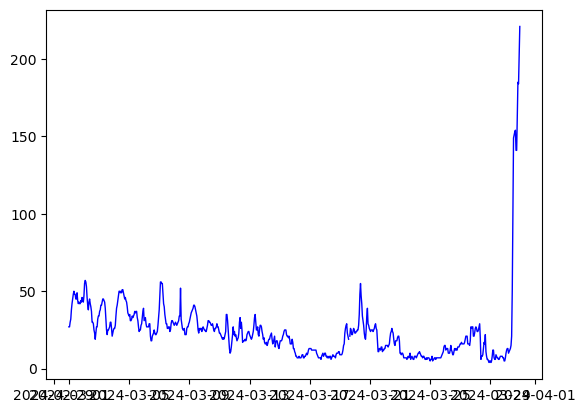

In [17]:
plt.plot(df_pm10['datetime'], df_pm10['value'], color="blue", linewidth=1)

In [2]:
df.sort_values(by='datetime').tail(10)

,datetime,station,core,component,period,value
9,2023-12-31 22:00:00+01:00,mc010,no,no_1h,1h,8.0
8,2023-12-31 22:00:00+01:00,mc010,no2,no2_1h,1h,27.0
7,2023-12-31 22:00:00+01:00,mc010,pm2,pm2_1h,1h,51.0
6,2023-12-31 22:00:00+01:00,mc010,pm10,pm10_1h,1h,64.0
5,2023-12-31 23:00:00+01:00,mc010,o3,o3_1h,1h,36.0
4,2023-12-31 23:00:00+01:00,mc010,nox,nox_1h,1h,24.0
3,2023-12-31 23:00:00+01:00,mc010,no,no_1h,1h,3.0
2,2023-12-31 23:00:00+01:00,mc010,no2,no2_1h,1h,18.0
1,2023-12-31 23:00:00+01:00,mc010,pm2,pm2_1h,1h,31.0
0,2023-12-31 23:00:00+01:00,mc010,pm10,pm10_1h,1h,37.0


In [3]:
df.sort_values(by='datetime').head(10)

,datetime,station,core,component,period,value
4469,2023-11-30 23:00:00+01:00,mc010,o3,o3_1h,1h,2.0
4464,2023-11-30 23:00:00+01:00,mc010,pm10,pm10_1h,1h,34.0
4465,2023-11-30 23:00:00+01:00,mc010,pm2,pm2_1h,1h,31.0
4468,2023-11-30 23:00:00+01:00,mc010,nox,nox_1h,1h,173.0
4467,2023-11-30 23:00:00+01:00,mc010,no,no_1h,1h,80.0
4466,2023-11-30 23:00:00+01:00,mc010,no2,no2_1h,1h,52.0
4462,2023-12-01 00:00:00+01:00,mc010,nox,nox_1h,1h,125.0
4461,2023-12-01 00:00:00+01:00,mc010,no,no_1h,1h,51.0
4460,2023-12-01 00:00:00+01:00,mc010,no2,no2_1h,1h,46.0
4459,2023-12-01 00:00:00+01:00,mc010,pm2,pm2_1h,1h,28.0


In [4]:
df['core'].value_counts()

core
pm10    745
pm2     745
no2     745
no      745
nox     745
o3      745
Name: count, dtype: int64

In [5]:
df_pm10 = df[(df["core"] == "pm10")]
#& (df["datetime"].astype(str).str.contains("20:00:00"))]
df_pm10.count()

datetime     745
station      745
core         745
component    745
period       745
value        745
dtype: int64

In [6]:
df_pm10.describe()

,value
count,745.000000
mean,14.448322
std,8.862773
min,3.000000
25%,7.000000
50%,13.000000
75%,20.000000
max,64.000000


In [7]:
start_time = pd.to_datetime("08:00:00").time()  # Set start time to 8 am
end_time = pd.to_datetime("18:00:00").time()    # Set end time to 6 pm

# Extract the time component from the datetime
df["time"] = df["datetime"].dt.time

# Filter rows where "time" is between start_time and end_time
df_filtered_working_hours = df[(df["time"] >= start_time) & (df["time"] <= end_time) & (df["core"] == "pm10") ]

df_filtered_working_hours.count()

datetime     341
station      341
core         341
component    341
period       341
value        341
time         341
dtype: int64

Time Series Prediction 
--> train-test split anders, da man nicht Daten der Vergangenheit vorhersagt

streamlit app am Ende programmieren